In [1]:
import pandas as  pd                  # For numerical operations (e.g., arrays, stats)
import pandas as pd                   # For data manipulation and reading CSV files
import matplotlib.pyplot as plt       # For plotting graphs
import seaborn as sns                 # For advanced visualizations
import datetime as dt                 # For handling date and time formats
import warnings
warnings.filterwarnings('ignore')  # Suppresses warning messages for cleaner output

 # Load the dataset
df = pd.read_csv("C:/Users/Bagnath/Downloads/CoffeeSales/coffee_sales.csv")
 
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


In [3]:
df.rename(columns={'card': 'customer_id'}, inplace=True)
df

,date,datetime,cash_type,customer_id,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


In [5]:
customer_summary = df.groupby('customer_id').agg({
    'money': ['sum', 'mean', 'count'],
    'coffee_name': pd.Series.nunique
}).reset_index()

customer_summary.columns = ['customer_id', 'total_spent', 'avg_spent', 'num_transactions', 'unique_products']
customer_summary


,customer_id,total_spent,avg_spent,num_transactions,unique_products
0,ANON-0000-0000-0001,646.14,38.008235,17,1
1,ANON-0000-0000-0002,77.40,38.700000,2,1
2,ANON-0000-0000-0003,651.96,28.346087,23,4
3,ANON-0000-0000-0004,289.50,32.166667,9,3
4,ANON-0000-0000-0005,33.80,33.800000,1,1
...,...,...,...,...,...
441,ANON-0000-0000-0442,32.82,32.820000,1,1
442,ANON-0000-0000-0443,78.86,26.286667,3,2
443,ANON-0000-0000-0444,32.82,32.820000,1,1
444,ANON-0000-0000-0445,32.82,32.820000,1,1


In [6]:
top_spenders = customer_summary.sort_values(by='total_spent', ascending=False).head(10)
top_buyers = customer_summary.sort_values(by='num_transactions', ascending=False).head(10)


In [7]:
customer_preferences = df.groupby(['customer_id', 'coffee_name']).size().unstack(fill_value=0)
customer_preferences

coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
customer_id,,,,,,,,
ANON-0000-0000-0001,0,0,0,0,0,0,0,17
ANON-0000-0000-0002,0,0,0,0,0,0,2,0
ANON-0000-0000-0003,17,1,0,0,4,1,0,0
ANON-0000-0000-0004,4,4,0,0,0,0,0,1
ANON-0000-0000-0005,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
ANON-0000-0000-0442,0,0,0,1,0,0,0,0
ANON-0000-0000-0443,0,0,0,0,2,0,0,1
ANON-0000-0000-0444,0,0,0,0,0,0,0,1


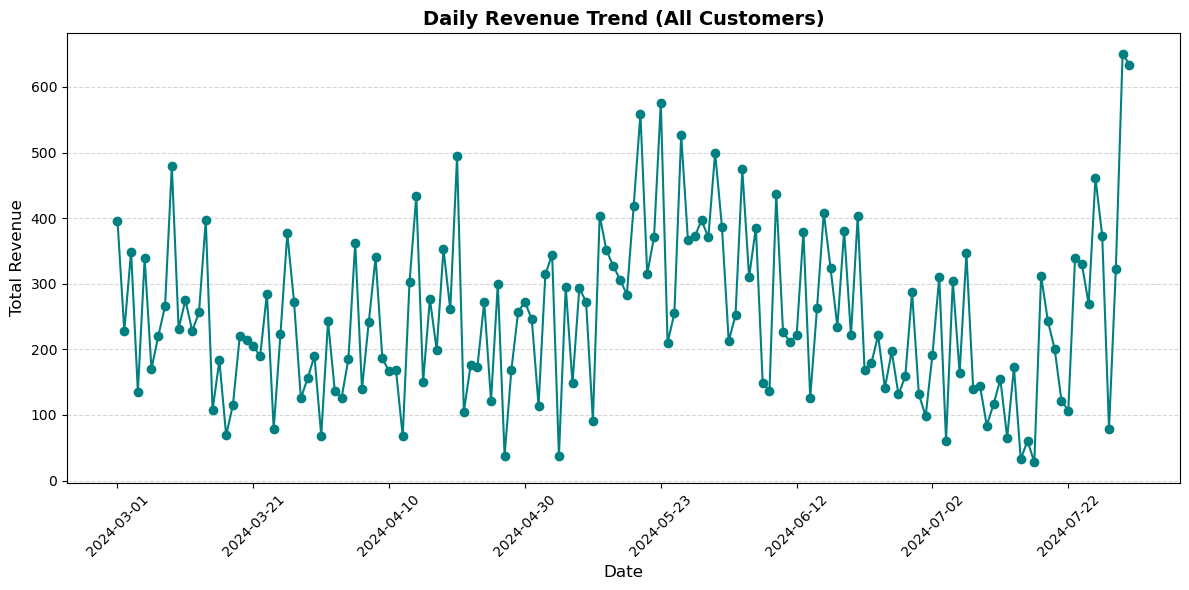

In [9]:
# Group by date and sum total revenue
daily_revenue = df.groupby('date')['money'].sum()

# Plot the daily revenue trend
daily_revenue.plot(kind='line', marker='o', figsize=(12, 6), color='teal')

# Chart formatting
plt.title('Daily Revenue Trend (All Customers)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
